# My first notebook

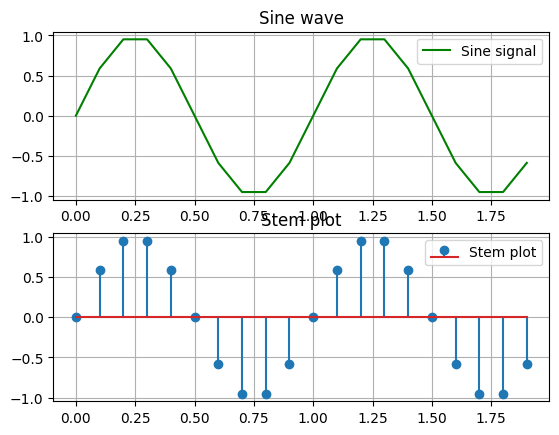

In [28]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 2, 0.1)
x = np.sin(2* np.pi * t)
plt.subplot(2,1,1)
plt.plot(t, x, label = "Sine signal", color ='g')
plt.title("Sine wave")
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.stem(t, x, label = "Stem plot")
plt.title("Stem plot")
plt.legend()
plt.grid()

C:\Users\User\AppData\Local\Temp\ipykernel_15960\2757563723.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, x, use_line_collection=True)


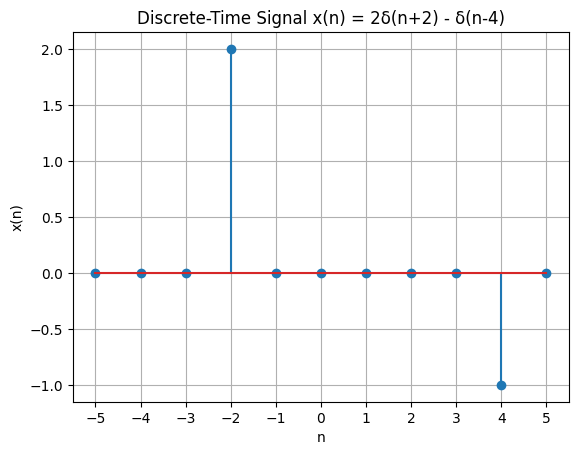

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of n
n = np.arange(-5, 6)

# Define x(n) based on the given equation
x = np.zeros_like(n, dtype=int)  # Initialize with zeros
x[np.where(n == -2)] = 2  # 2 * delta(n+2)
x[np.where(n == 4)] = -1  # -delta(n-4)


# Plot the discrete-time signal
plt.stem(n, x, use_line_collection=True)
plt.xlabel("n")
plt.ylabel("x(n)")
plt.title("Discrete-Time Signal x(n) = 2δ(n+2) - δ(n-4)")
plt.grid(True)
plt.xticks(n)
plt.show()

# y = np.zeros_like(n, dtype=int)
# print(y)


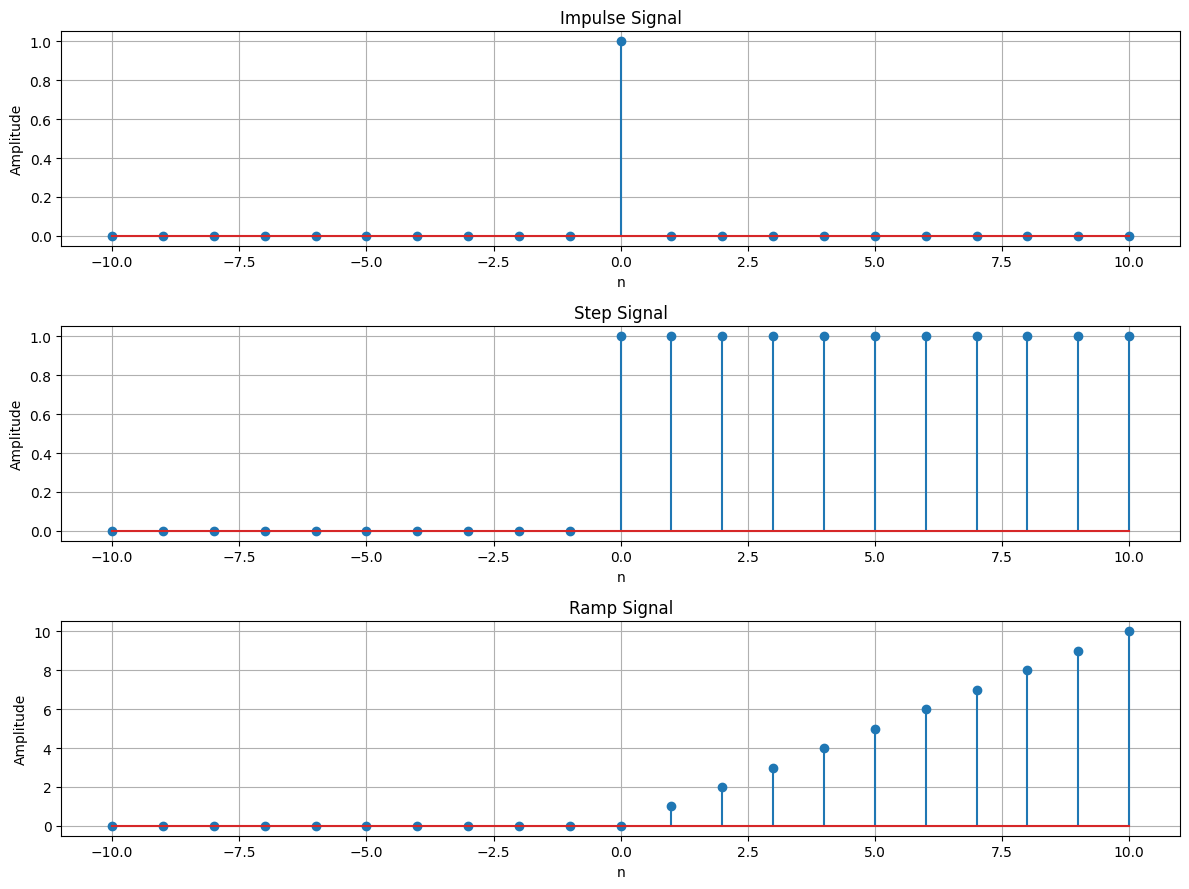

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range
n = np.arange(-10, 11)

# Define functions for signals
def impulse_signal(n):
   return np.where(n == 0, 1, 0)

def step_signal(n):
   return np.where(n >= 0, 1, 0)

def ramp_signal(n):
   return np.where(n >= 0, n, 0)

# Generate signals
impulse = impulse_signal(n)
step = step_signal(n)
ramp = ramp_signal(n)

# Plot signals
plt.figure(figsize=(12, 9))

# Impulse Signal
plt.subplot(3, 1, 1)
plt.stem(n, impulse)
plt.title("Impulse Signal")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

# Step Signal
plt.subplot(3, 1, 2)
plt.stem(n, step)
plt.title("Step Signal")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

# Ramp Signal
plt.subplot(3, 1, 3)
plt.stem(n, ramp)
plt.title("Ramp Signal")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


DFT

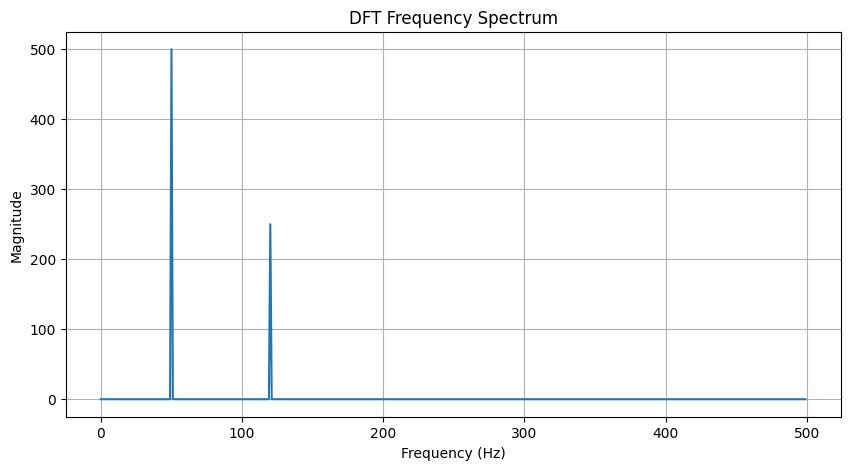

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def DFT(x):
    """
    Compute the Discrete Fourier Transform (DFT) of a 1D signal.
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)  # Output array (complex numbers)

    for k in range(N):  # Loop over frequency bins
        for n in range(N):  # Loop over time samples
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    
    return X

# Create a sample signal (two sine waves)
Fs = 1000  # Sampling rate
T = 1 / Fs  # Sampling interval
t = np.linspace(0, 1, Fs, endpoint=False)  # 1 second duration

# Signal: Combination of 50 Hz and 120 Hz sine waves
f1, f2 = 50, 120
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Compute DFT
dft_output = DFT(signal)

# Compute frequency bins
freqs = np.fft.fftfreq(len(dft_output), T)


# Plot magnitude spectrum (single-sided)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:Fs//2], np.abs(dft_output[:Fs//2]))  # Single-sided spectrum
plt.title("DFT Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


Frequency bin

In [71]:
import numpy as np

# Define parameters
N = 1024   # Number of points in DFT
Fs = 1000  # Sampling frequency (Hz)

# Compute frequency bins manually
freq_bins = np.array([(k / N) * Fs for k in range(N)])


print(freq_bins[:10])  # Print first 10 frequency bins

# Compute Frequency Bins Using NumPy
# Instead of computing manually, NumPy provides a built-in function np.fft.fftfreq(), which calculates the bins directly.
# python
# CopyEdit
# import numpy as np

N = 1024   # Number of points in DFT
Fs = 1000  # Sampling frequency

# Compute frequency bins using NumPy
freq_bins = np.fft.fftfreq(N, d=1/Fs)

print(freq_bins[:10])  # Print first 10 frequency bins


[0.        0.9765625 1.953125  2.9296875 3.90625   4.8828125 5.859375
 6.8359375 7.8125    8.7890625]
[0.        0.9765625 1.953125  2.9296875 3.90625   4.8828125 5.859375
 6.8359375 7.8125    8.7890625]


Removing Noise from an Audio Signal

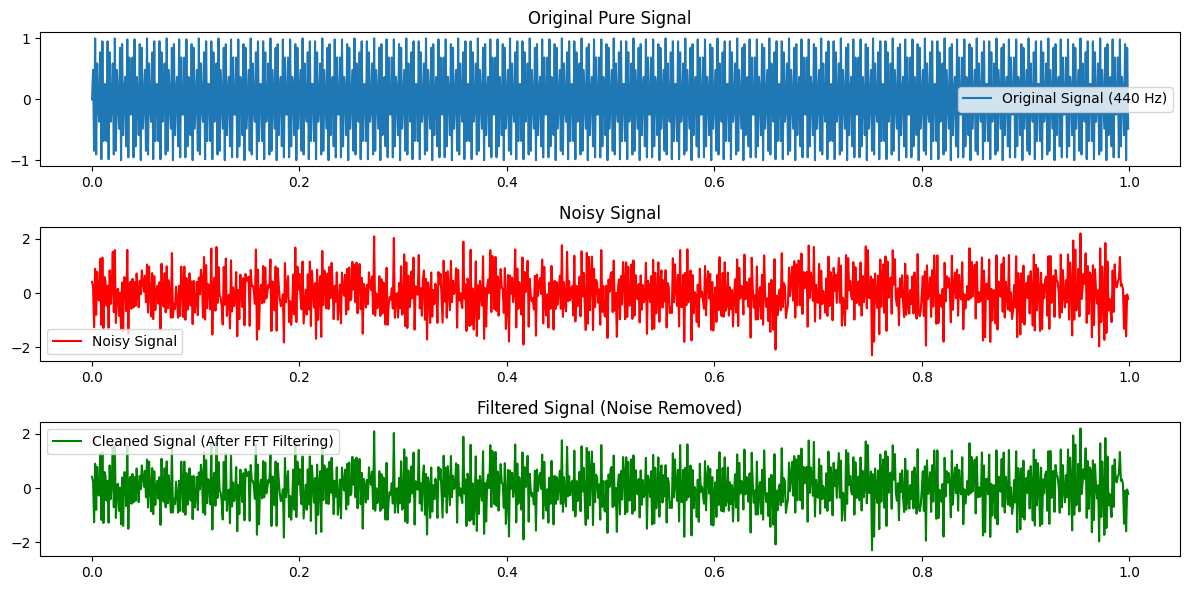

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

#base signal
fs = 1000
T = 1 / fs
t = np.linspace(0, 1, fs, endpoint=False)

pure_signal = np.sin(2*np.pi*420*t)
noise = np.random.normal(0, 0.5, pure_signal.shape)
noise_signal = pure_signal + noise

fft_signal = fft(noise_signal)
freqs = fftfreq(len(fft_signal), T)

fft_filtered = fft_signal.copy()
fft_filtered[np.abs(freqs > 500)] = 0

cleaned_signal = ifft(fft_filtered).real

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, pure_signal, label="Original Signal (440 Hz)")
plt.legend()
plt.title("Original Pure Signal")

plt.subplot(3, 1, 2)
plt.plot(t, noise_signal, label="Noisy Signal", color="red")
plt.legend()
plt.title("Noisy Signal")

plt.subplot(3, 1, 3)
plt.plot(t, cleaned_signal, label="Cleaned Signal (After FFT Filtering)", color="green")
plt.legend()
plt.title("Filtered Signal (Noise Removed)")

plt.tight_layout()
plt.show()

Correlation

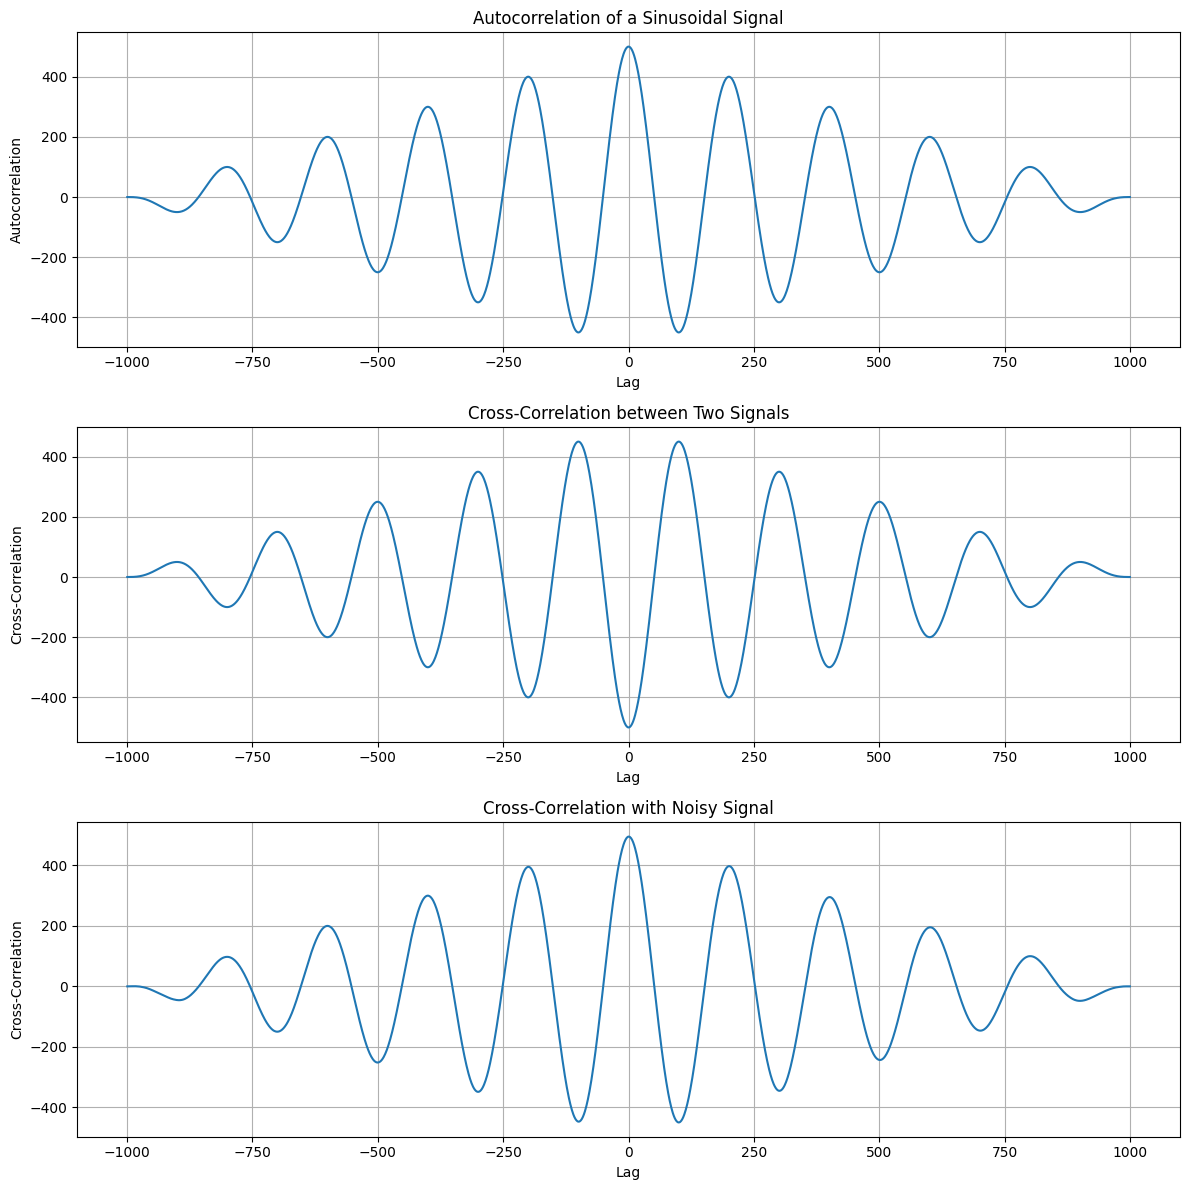

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import correlate, correlation_lags 
def compute_autocorrelation(signal): 
    auto_corr = correlate(signal, signal, mode='full', method='auto') 
    lags = correlation_lags(len(signal), len(signal), mode='full') 
    return auto_corr, lags 
def compute_cross_correlation(signal1, signal2): 
    cross_corr = correlate(signal1, signal2, mode='full', method='auto') 
    lags = correlation_lags(len(signal1), len(signal2), mode='full') 
    return cross_corr, lags 
 
fs = 1000  # Sampling frequency in Hz 
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector 
freq = 5  # Frequency of the sine wave 
 
sin_signal = np.sin(2 * np.pi * freq * t) 
 
auto_corr, lags_auto = compute_autocorrelation(sin_signal) 
signal1 = sin_signal 
signal2 = np.roll(signal1, 100) 
cross_corr, lags_cross = compute_cross_correlation(signal1, signal2) 
noise = np.random.normal(0, 0.5, fs) 
noisy_signal = signal1 + noise 
cross_corr_noise, lags_noise = compute_cross_correlation(signal1, noisy_signal) 
 
plt.figure(figsize=(12, 12)) 
 
plt.subplot(3, 1, 1) 
plt.plot(lags_auto, auto_corr) 
plt.title("Autocorrelation of a Sinusoidal Signal") 
plt.xlabel("Lag") 
plt.ylabel("Autocorrelation") 
plt.grid() 
 
plt.subplot(3, 1, 2) 
plt.plot(lags_cross, cross_corr) 
plt.title("Cross-Correlation between Two Signals") 
plt.xlabel("Lag") 
plt.ylabel("Cross-Correlation") 
plt.grid() 
 
plt.subplot(3, 1, 3) 
plt.plot(lags_noise, cross_corr_noise) 
plt.title("Cross-Correlation with Noisy Signal") 
plt.xlabel("Lag") 
plt.ylabel("Cross-Correlation") 
plt.grid() 
 
plt.tight_layout() 

Convolution

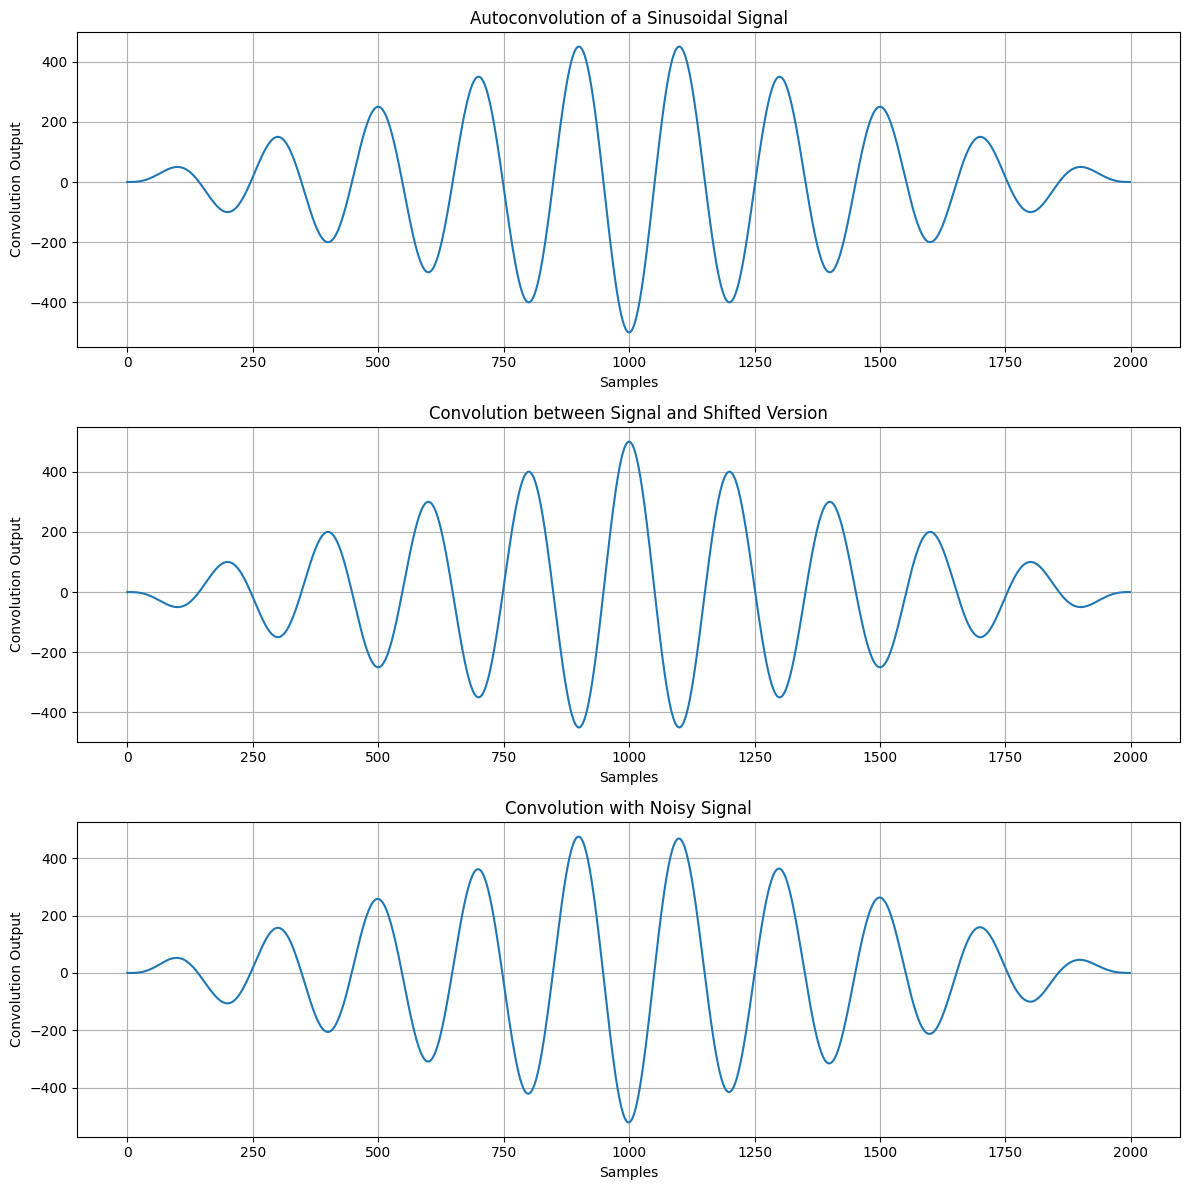

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import convolve 
def compute_convolution(signal1, signal2): 
    conv_result = convolve(signal1, signal2, mode='full', method='auto') 
    return conv_result 
fs = 1000  # Sampling frequency in Hz 
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector 
freq = 5  # Frequency of the sine wave 
sin_signal = np.sin(2 * np.pi * freq * t) 
conv_auto = compute_convolution(sin_signal, sin_signal) 
signal1 = sin_signal 
signal2 = np.roll(signal1, 100) 
conv_shifted = compute_convolution(signal1, signal2) 
noise = np.random.normal(0, 0.5, fs) 
noisy_signal = signal1 + noise 
conv_noisy = compute_convolution(signal1, noisy_signal) 
 
plt.figure(figsize=(12, 12)) 
 
plt.subplot(3, 1, 1) 
plt.plot(conv_auto) 
plt.title("Autoconvolution of a Sinusoidal Signal") 
plt.xlabel("Samples") 
plt.ylabel("Convolution Output") 
plt.grid() 
 
plt.subplot(3, 1, 2) 
plt.plot(conv_shifted) 
plt.title("Convolution between Signal and Shifted Version") 
plt.xlabel("Samples") 
plt.ylabel("Convolution Output") 
plt.grid() 
 
plt.subplot(3, 1, 3) 
plt.plot(conv_noisy) 
plt.title("Convolution with Noisy Signal") 
plt.xlabel("Samples") 
plt.ylabel("Convolution Output") 
plt.grid() 
 
plt.tight_layout() 
plt.show() 

PPG Signal

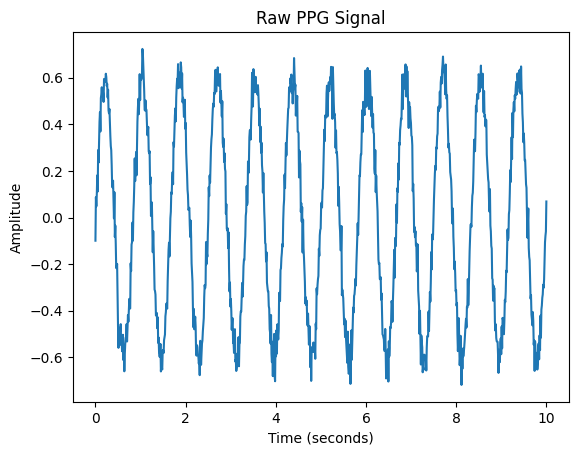

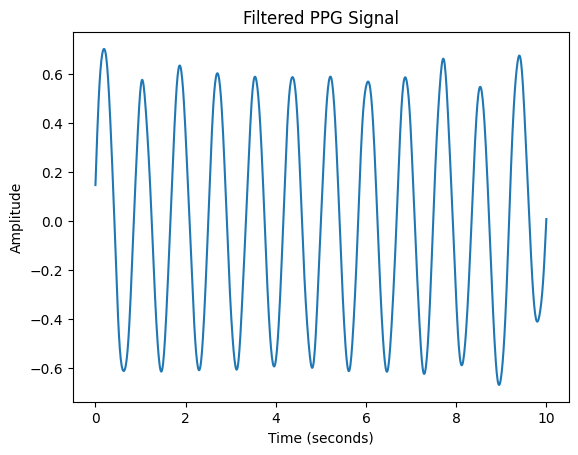

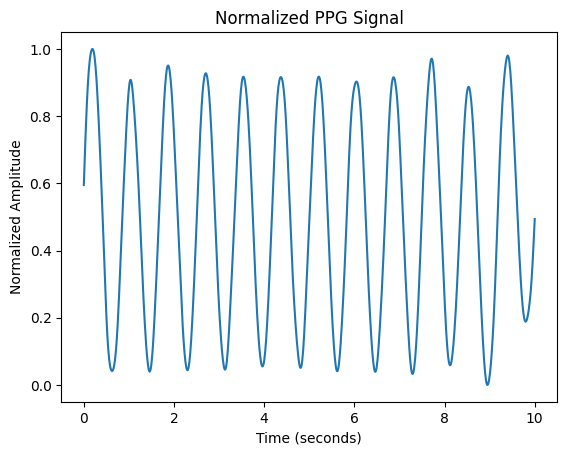

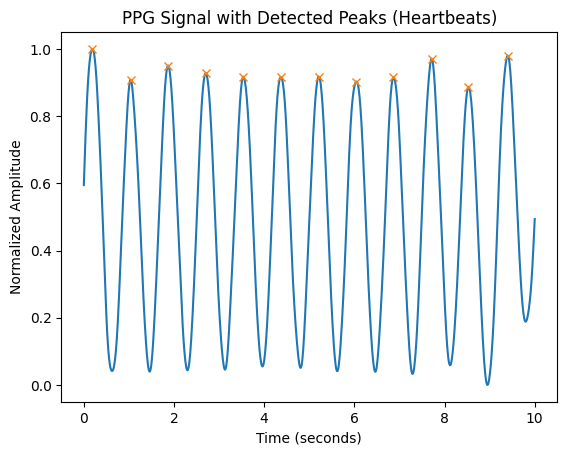

Heart Rate:  71.76368754310661  BPM


In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating a PPG signal (replace with actual data)
fs = 100  # Sampling rate (Hz)
t = np.linspace(0, 10, fs * 10)  # 10 seconds of data
ppg_signal = 0.6 * np.sin(2 * np.pi * 1.2 * t) + np.random.normal(0, 0.05, len(t))

# Plotting the raw PPG signal
plt.plot(t, ppg_signal)
plt.title("Raw PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

from scipy.signal import butter, filtfilt

# Bandpass filter design (0.5 to 5 Hz for heart rate detection)
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Filtered PPG signal
filtered_ppg = bandpass_filter(ppg_signal, 0.5, 5, fs)
plt.plot(t, filtered_ppg)
plt.title("Filtered PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

normalized_ppg = (filtered_ppg - np.min(filtered_ppg)) / (np.max(filtered_ppg) - np.min(filtered_ppg))
plt.plot(t, normalized_ppg)
plt.title("Normalized PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.show()

from scipy.signal import find_peaks

# Detect peaks in the PPG signal
peaks, _ = find_peaks(normalized_ppg, distance=fs*0.6)  # Minimum distance of 0.6 seconds between peaks (for HR < 100 BPM)

# Calculate Heart Rate (BPM)
ibi = np.diff(peaks) / fs  # Inter-beat interval in seconds
heart_rate = 60 / ibi  # Convert to beats per minute (BPM)

# Plot the PPG signal with detected peaks
plt.plot(t, normalized_ppg)
plt.plot(t[peaks], normalized_ppg[peaks], "x")
plt.title("PPG Signal with Detected Peaks (Heartbeats)")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.show()

print("Heart Rate: ", np.mean(heart_rate), " BPM")
